In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/The School of AI/EVA Program/Week_6_Ghost_Norm

/content/drive/MyDrive/The School of AI/EVA Program/Week_6_Ghost_Norm


In [13]:
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm, trange
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
import copy

### Importing all the modules of the code

The whole code is divided into 3 modules. 

 - Train test data loader: 
	 - It includes downloading datasets and applying transforms to the dataset. Also it returns train and test data loader. 
 - Model file
	 -  It contains model structure for batch norm model and ghost batch norm model. 
 - Training/ Testing function module
	 - It contains train and test utlity functions. 


In [4]:
from batch_norm_model import Net
from train_test_module import train_test_data_loader
from ghost_batch_model import GhostNet
from trainer import Training

In [5]:
train_loader, test_loader = train_test_data_loader()

CUDA Available? True


### Looking into data

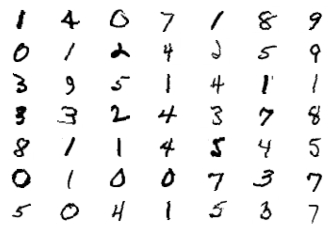

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

figure = plt.figure()
num_of_images = 49
for index in range(1, num_of_images+1 ):
    plt.subplot(7, 7, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 28, 24, 24]           2,520
              ReLU-6           [-1, 28, 24, 24]               0
       BatchNorm2d-7           [-1, 28, 24, 24]              56
           Dropout-8           [-1, 28, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             280
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
          Dropout-12           [-1, 10, 24, 24]               0
        MaxPool2d-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

In [8]:
gbn_model = Net().to(device)
summary(gbn_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 28, 24, 24]           2,520
              ReLU-6           [-1, 28, 24, 24]               0
       BatchNorm2d-7           [-1, 28, 24, 24]              56
           Dropout-8           [-1, 28, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             280
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
          Dropout-12           [-1, 10, 24, 24]               0
        MaxPool2d-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1, 10,

### Iterating over all 5 experiments

- BN + L1
- BN + L2
- BN + L1 + L2
- GBN
- GBN + L1 + L2
 

In [17]:
EPOCHS= 15
metric_values = {}
models = {}



for i in range(0,5):
  if i==0:
    print("With BN + L1 ")
    model1 = Net().to(device)
    optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.95)    
    trainer1 = Training(model1, optimizer, train_loader, test_loader, device, l1=10e-4)
    train_metric, test_metric = trainer1.train(n_epoch=EPOCHS)
    metric_values['With BN + L1']=copy.deepcopy((train_metric, test_metric))
    models['With BN + L1'] = copy.deepcopy(model1)
  if i==1:
    print("With BN + L2 ")
    model2 = Net().to(device)
    optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.95, weight_decay=10e-4)
    trainer2 = Training(model2, optimizer, train_loader, test_loader, device)
    train_metric, test_metric = trainer2.train(n_epoch=EPOCHS)
    metric_values['With BN + L2']=copy.deepcopy((train_metric, test_metric))
    models['With BN + L1'] = copy.deepcopy(model2)
  if i==2:
    print("With BN + L2 + L1 ")
    model3 = Net().to(device)
    optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.95, weight_decay=10e-4)
    trainer3 = Training(model3, optimizer, train_loader, test_loader, device, l1=10e-4)
    train_metric, test_metric = trainer3.train(n_epoch=EPOCHS)
    metric_values['With BN + L1 + L2']=copy.deepcopy((train_metric, test_metric))
    models['With BN + L1 + L2'] = copy.deepcopy(model3)
  if i==3:
    print("With GBN")
    model4 = GhostNet().to(device)
    optimizer = optim.SGD(model4.parameters(), lr=0.01, momentum=0.95)
    trainer4 = Training(model4, optimizer, train_loader, test_loader, device)
    train_metric, test_metric = trainer4.train(n_epoch=EPOCHS)
    metric_values['With GBN']=copy.deepcopy((train_metric, test_metric))
    models['With GBN'] = copy.deepcopy(model4)
  if i==4:
    print("With GBN + L1 + L2")
    model5 = Net().to(device)
    optimizer = optim.SGD(model5.parameters(), lr=0.01, momentum=0.95, weight_decay=10e-4)
    trainer5 = Training(model5, optimizer, train_loader, test_loader, device, l1=10e-4)
    train_metric, test_metric = trainer5.train(n_epoch=EPOCHS)
    metric_values['With GBN + L1 + L2']=copy.deepcopy((train_metric, test_metric))
    models['With GBN + L1 + L2'] = copy.deepcopy(model5)      

With BN + L1 
Training the model for 15 epochs
EPOCH: 1




Test set: Average loss: 0.1652, Accuracy: 9496/10000 (94.96%)

EPOCH: 2




Test set: Average loss: 0.0931, Accuracy: 9736/10000 (97.36%)

EPOCH: 3




Test set: Average loss: 0.0996, Accuracy: 9692/10000 (96.92%)

EPOCH: 4




Test set: Average loss: 0.1261, Accuracy: 9620/10000 (96.20%)

EPOCH: 5




Test set: Average loss: 0.1369, Accuracy: 9592/10000 (95.92%)

EPOCH: 6




Test set: Average loss: 0.0690, Accuracy: 9810/10000 (98.10%)

EPOCH: 7




Test set: Average loss: 0.0657, Accuracy: 9815/10000 (98.15%)

EPOCH: 8




Test set: Average loss: 0.0862, Accuracy: 9739/10000 (97.39%)

EPOCH: 9




Test set: Average loss: 0.1341, Accuracy: 9591/10000 (95.91%)

EPOCH: 10




Test set: Average loss: 0.0720, Accuracy: 9797/10000 (97.97%)

EPOCH: 11




Test set: Average loss: 0.0990, Accuracy: 9696/10000 (96.96%)

EPOCH: 12




Test set: Average loss: 0.0923, Accuracy: 9720/10000 (97.20%)

EPOCH: 13




Test set: Average loss: 0.0748, Accuracy: 9777/10000 (97.77%)

EPOCH: 14




Test set: Average loss: 0.0919, Accuracy: 9716/10000 (97.16%)

EPOCH: 15




Test set: Average loss: 0.1075, Accuracy: 9679/10000 (96.79%)

With BN + L2 
Training the model for 15 epochs
EPOCH: 1




Test set: Average loss: 0.0762, Accuracy: 9804/10000 (98.04%)

EPOCH: 2




Test set: Average loss: 0.0524, Accuracy: 9856/10000 (98.56%)

EPOCH: 3




Test set: Average loss: 0.0444, Accuracy: 9876/10000 (98.76%)

EPOCH: 4




Test set: Average loss: 0.0441, Accuracy: 9883/10000 (98.83%)

EPOCH: 5




Test set: Average loss: 0.0413, Accuracy: 9881/10000 (98.81%)

EPOCH: 6




Test set: Average loss: 0.0369, Accuracy: 9897/10000 (98.97%)

EPOCH: 7




Test set: Average loss: 0.0443, Accuracy: 9878/10000 (98.78%)

EPOCH: 8




Test set: Average loss: 0.0389, Accuracy: 9900/10000 (99.00%)

EPOCH: 9




Test set: Average loss: 0.0367, Accuracy: 9903/10000 (99.03%)

EPOCH: 10




Test set: Average loss: 0.0376, Accuracy: 9899/10000 (98.99%)

EPOCH: 11




Test set: Average loss: 0.0326, Accuracy: 9898/10000 (98.98%)

EPOCH: 12




Test set: Average loss: 0.0344, Accuracy: 9911/10000 (99.11%)

EPOCH: 13




Test set: Average loss: 0.0537, Accuracy: 9848/10000 (98.48%)

EPOCH: 14




Test set: Average loss: 0.0375, Accuracy: 9901/10000 (99.01%)

EPOCH: 15




Test set: Average loss: 0.0384, Accuracy: 9884/10000 (98.84%)

With BN + L2 + L1 
Training the model for 15 epochs
EPOCH: 1




Test set: Average loss: 0.2554, Accuracy: 9235/10000 (92.35%)

EPOCH: 2




Test set: Average loss: 0.1159, Accuracy: 9714/10000 (97.14%)

EPOCH: 3




Test set: Average loss: 0.0765, Accuracy: 9780/10000 (97.80%)

EPOCH: 4




Test set: Average loss: 0.1024, Accuracy: 9737/10000 (97.37%)

EPOCH: 5




Test set: Average loss: 0.2426, Accuracy: 9263/10000 (92.63%)

EPOCH: 6




Test set: Average loss: 0.0843, Accuracy: 9763/10000 (97.63%)

EPOCH: 7




Test set: Average loss: 0.1772, Accuracy: 9467/10000 (94.67%)

EPOCH: 8




Test set: Average loss: 0.1460, Accuracy: 9568/10000 (95.68%)

EPOCH: 9




Test set: Average loss: 0.0833, Accuracy: 9780/10000 (97.80%)

EPOCH: 10




Test set: Average loss: 0.0842, Accuracy: 9769/10000 (97.69%)

EPOCH: 11




Test set: Average loss: 0.1003, Accuracy: 9728/10000 (97.28%)

EPOCH: 12




Test set: Average loss: 0.0899, Accuracy: 9762/10000 (97.62%)

EPOCH: 13




Test set: Average loss: 0.1248, Accuracy: 9612/10000 (96.12%)

EPOCH: 14




Test set: Average loss: 0.1087, Accuracy: 9683/10000 (96.83%)

EPOCH: 15




Test set: Average loss: 0.0882, Accuracy: 9763/10000 (97.63%)

With GBN
Training the model for 15 epochs
EPOCH: 1




Test set: Average loss: 0.0615, Accuracy: 9820/10000 (98.20%)

EPOCH: 2




Test set: Average loss: 0.0402, Accuracy: 9889/10000 (98.89%)

EPOCH: 3




Test set: Average loss: 0.0386, Accuracy: 9884/10000 (98.84%)

EPOCH: 4




Test set: Average loss: 0.0347, Accuracy: 9897/10000 (98.97%)

EPOCH: 5




Test set: Average loss: 0.0272, Accuracy: 9919/10000 (99.19%)

EPOCH: 6




Test set: Average loss: 0.0275, Accuracy: 9912/10000 (99.12%)

EPOCH: 7




Test set: Average loss: 0.0264, Accuracy: 9919/10000 (99.19%)

EPOCH: 8




Test set: Average loss: 0.0241, Accuracy: 9925/10000 (99.25%)

EPOCH: 9




Test set: Average loss: 0.0260, Accuracy: 9918/10000 (99.18%)

EPOCH: 10




Test set: Average loss: 0.0224, Accuracy: 9933/10000 (99.33%)

EPOCH: 11




Test set: Average loss: 0.0250, Accuracy: 9922/10000 (99.22%)

EPOCH: 12




Test set: Average loss: 0.0276, Accuracy: 9907/10000 (99.07%)

EPOCH: 13




Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

EPOCH: 14




Test set: Average loss: 0.0221, Accuracy: 9933/10000 (99.33%)

EPOCH: 15




Test set: Average loss: 0.0198, Accuracy: 9942/10000 (99.42%)

With GBN + L1 + L2
Training the model for 15 epochs
EPOCH: 1




Test set: Average loss: 0.0987, Accuracy: 9760/10000 (97.60%)

EPOCH: 2




Test set: Average loss: 0.1170, Accuracy: 9696/10000 (96.96%)

EPOCH: 3




Test set: Average loss: 0.1335, Accuracy: 9600/10000 (96.00%)

EPOCH: 4




Test set: Average loss: 0.1057, Accuracy: 9675/10000 (96.75%)

EPOCH: 5




Test set: Average loss: 0.1176, Accuracy: 9667/10000 (96.67%)

EPOCH: 6




Test set: Average loss: 0.1279, Accuracy: 9630/10000 (96.30%)

EPOCH: 7




Test set: Average loss: 0.0914, Accuracy: 9783/10000 (97.83%)

EPOCH: 8




Test set: Average loss: 0.1113, Accuracy: 9694/10000 (96.94%)

EPOCH: 9




Test set: Average loss: 0.1039, Accuracy: 9707/10000 (97.07%)

EPOCH: 10




Test set: Average loss: 0.1319, Accuracy: 9605/10000 (96.05%)

EPOCH: 11




Test set: Average loss: 0.1157, Accuracy: 9646/10000 (96.46%)

EPOCH: 12




Test set: Average loss: 0.1368, Accuracy: 9582/10000 (95.82%)

EPOCH: 13




Test set: Average loss: 0.0952, Accuracy: 9722/10000 (97.22%)

EPOCH: 14




Test set: Average loss: 0.1044, Accuracy: 9694/10000 (96.94%)

EPOCH: 15




Test set: Average loss: 0.1129, Accuracy: 9690/10000 (96.90%)



### Comparing validation accuracy of all 5 experiments

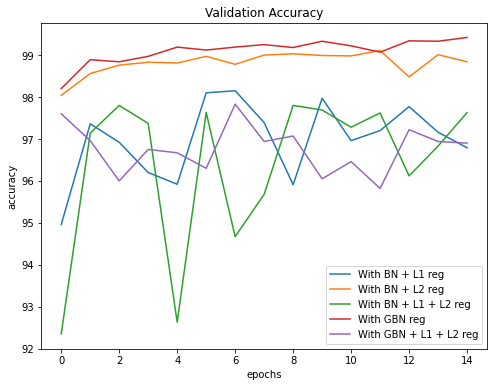

In [18]:
plt.figure(figsize=(8, 6))
plt.title('Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
for idx, exp_name in enumerate(metric_values.keys()):
    train_metric, test_metric = metric_values[exp_name]
    test_acc, test_loss = test_metric
    plt.plot(test_acc, label='{} reg'.format(exp_name))
plt.legend()
plt.show()

### Comparing validation loss of all 5 experiments

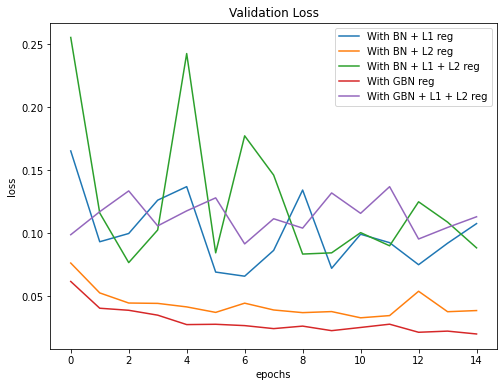

In [20]:
plt.figure(figsize=(8, 6))
plt.title('Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
for idx, exp_name in enumerate(metric_values.keys()):
    train_metric, test_metric = metric_values[exp_name]
    test_acc, test_loss = test_metric
    plt.plot(test_loss, label='{} reg'.format(exp_name))
plt.legend()
plt.show()

### Misclassifications of GBN model

In [23]:
def plot_misclassification(misclassified):
    num_images = 25
    fig = plt.figure(figsize=(12, 14))
    fig.suptitle('Misclassifications')
    for idx, (image, pred, target) in enumerate(misclassified[:num_images]):
        image, pred, target = image.cpu().numpy(), pred.cpu(), target.cpu()
        ax = fig.add_subplot(5, 5, idx+1)
        ax.axis('off')
        ax.set_title('target {}\npred {}'.format(target.item(), pred.item()), fontsize=12)
        ax.imshow(image.squeeze())
    plt.show()



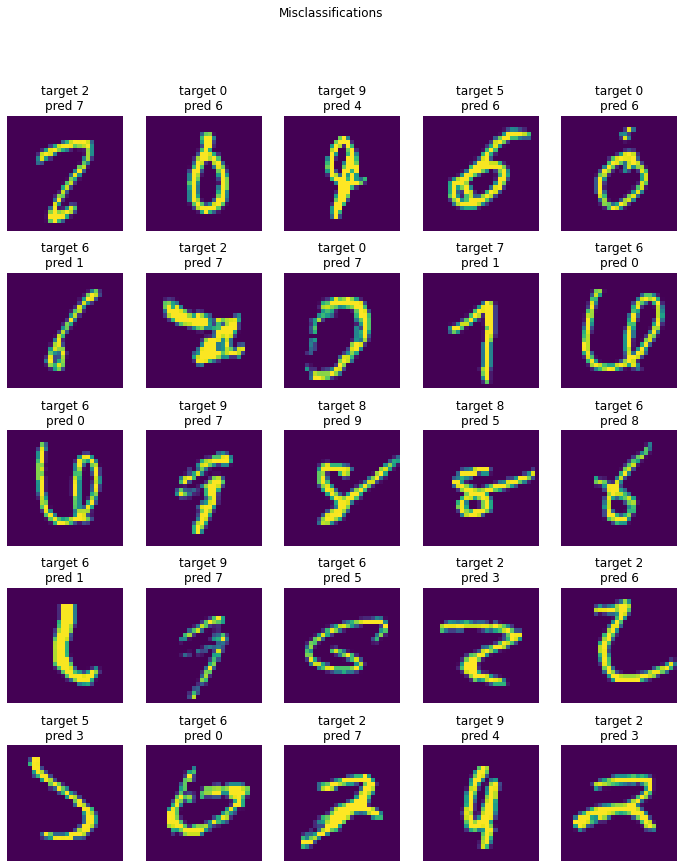

In [24]:
misclassified = trainer4.get_misclassified()
plot_misclassification(misclassified)